Matplotlib's animation base class deals with the animation part. It provides a framework around which the animation functionality is built. There are two main interfaces to achieve that using:

* `FuncAnimation` Makes an animation by repeatedly calling a function func.
* `ArtistAnimation`Animation using a fixed set of Artist objects.

However,  out of the two, FuncAnimation is the most convenient one to use. You can read more about them in the documentation since we will only concern ourselves with the FuncAnimation tool.

## Requirements

Modules including 'numpy' and 'matplotlib' should be installed.
To save the animation on your system as mp4 or gif, [ffmpeg] (https://www.ffmpeg.org/) or [imagemagick](https://sourceforge.net/projects/imagemagick/files/) is required to be installed.

### Basic Animation: Moving Sine Wave

Let's use FuncAnimation to create a basic animation of a sine wave moving across the screen. The source code for the animation has been taken from the [Matplotlib Animation tutorial](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/). Let's first see the output and then we shall break down the code to understand what's going under the hood.

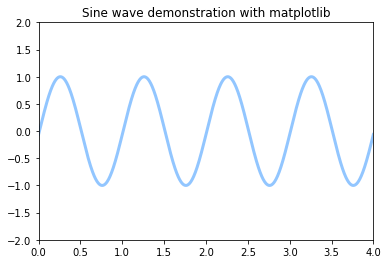

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
ax.set_title('Sine wave demonstration with matplotlib')
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x + 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(
    fig=fig, 
    func=animate, 
    init_func=init,
    frames=200, 
    interval=20, 
    blit=True
)

anim.save('sine_wave.gif', writer='imagemagick')

In [16]:
from IPython.display import IFrame
IFrame('sine_wave.gif', width=800, height=400)

## A Growing Coil
There is a nice example of creating shapes at [GeeksforGeeks](https://www.geeksforgeeks.org/graph-plotting-python-set-3/). Let's now create a moving coil which slowly unwinds, with the help of animation class of matplotlib. The code is quite similar to the sine wave plot with minor adjustments.

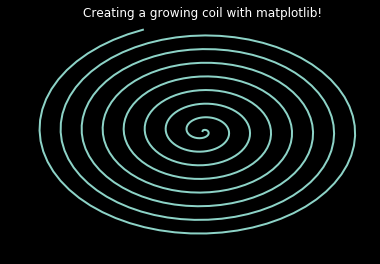

In [18]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 
    
    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 
    
    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 
    
    
# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator     
anim = animation.FuncAnimation(
    fig=fig, 
    func=animate, 
    init_func=init, 
    frames=500, 
    interval=20, blit=True
) 

# save the animation as mp4 video file 
anim.save('coil.gif', writer='imagemagick') 

In [19]:
from IPython.display import IFrame
IFrame('coil.gif', width=800, height=300)

## Live Updating Graphs

In [26]:
open('stock.txt','r').read().strip().split('\n')

['1,100', '2,200', '3,600', '4,900', '5,700', '6,120']

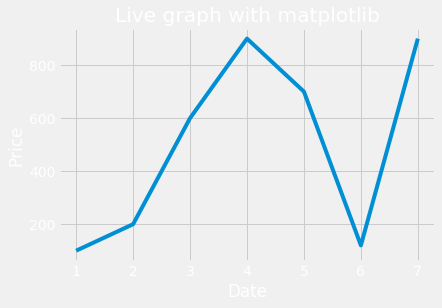

In [28]:
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('fivethirtyeight')

fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read().strip()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')
    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()

In [20]:
from IPython.display import IFrame
IFrame('https://cdn-images-1.medium.com/max/800/1*nzPptovV8Gwp_6vHWoo3PQ.gif', width=800, height=500)

# Animation on a 3D plot

In [ ]:
"""Create a folder called volcano in the same directory as the notebook. 
All the images will be stored in this folder which will be then used in the animation."""

# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]

# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):

# Make the plot
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

    ax.view_init(30,angle)

    filename='Volcano/Volcano_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
    
"""
This will create multiple PNG files in the VOlcano folder. 
Now, use ImageMagick to transform them into animation. 
Open Terminal and navigate to the Volcano folder and enter the following command:"""

# convert -delay 10 Volcano*.png animated_volcano.gif

In [33]:
!convert -delay 10 ./Volcano/Volcano*.png animated_volcano.gif

In [34]:
from IPython.display import IFrame
IFrame('animated_volcano.gif', width=800, height=350)

## Animations using Celluloid Module

[Celluloid](https://github.com/jwkvam/celluloid) is a Python module that simplifies the process of creating animations in matplotlib. This library creates a matplotlib figure and creates a 'Camera' from it. It then reuses figure and after each frame is created, take a snapshot with the camera. Finally, an animation is created with all the captured frames.

In [ ]:
#Installation
# !pip install celluloid

### Minimal

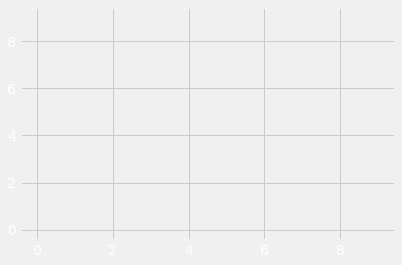

In [36]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()

camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')

In [38]:
from IPython.display import IFrame
IFrame('celluloid_minimal.gif', width=800, height=350)

### Subplots

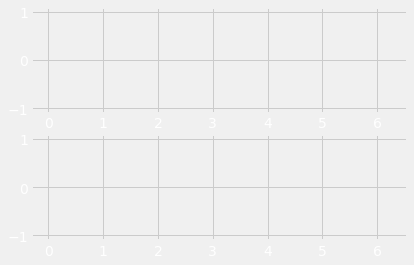

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'imagemagick')

In [40]:
from IPython.display import IFrame
IFrame('celluloid_subplots.gif', width=800, height=350)

### Legends

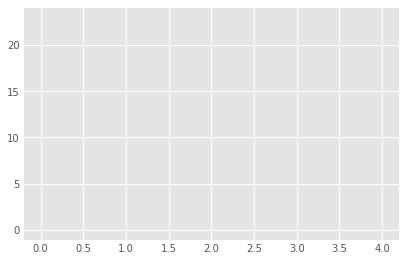

In [41]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
plt.style.use('ggplot')

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick')

In [42]:
from IPython.display import IFrame
IFrame('celluloid_legends.gif', width=800, height=350)